In [170]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns


In [171]:
# Import data
train = pd.read_csv('Data/train.csv')

#examine shape: format (rows, columns)
print(train.shape)

#8693 rows is a lot, so view the first couple rows 
train.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [172]:
# Determine data types
print(train.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


In [173]:
# Check for and remove NaN values

# Number of NaN values in each column
num_nan = train.isnull().sum()

# Print columns with NaN values greater than 0
print(num_nan[num_nan > 0])

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
dtype: int64


In [174]:
# Drop rows with NaN values
train = train.dropna()

# Number of NaN values in each column
num_nan = train.isnull().sum()

# Print columns with NaN values greater than 0
print(num_nan[num_nan > 0])


Series([], dtype: int64)


In [175]:
# Remove unique columns

# Find unique columns
train.select_dtypes(include=['object']).nunique()

PassengerId    6606
HomePlanet        3
CryoSleep         2
Cabin          5305
Destination       3
VIP               2
Name           6590
dtype: int64

In [176]:
#drop object variables with too manyb unique values
train.drop(["Cabin","Name"], axis=1, inplace=True)

print(train.dtypes)
#unneeded rows dropped!

PassengerId      object
HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object


PCA Analysis

In [192]:
# Features I want to look at
features = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

testing_variable = 'HomePlanet'

features.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


In [193]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

pca_df.head()

,PC1,PC2
0,-0.466113,-0.470630
1,-0.181762,-0.259368
2,4.120984,0.308589
3,1.716691,0.341139
4,-0.183002,0.106895


In [194]:
# Loadings to determine which features are most important

# Get loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for the loadings
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])],
                             index=features.columns)

print (loadings_df)

                   PC1       PC2
RoomService  -0.047135  0.722819
FoodCourt     0.727863 -0.030016
ShoppingMall  0.007452  0.720240
Spa           0.653041  0.140178
VRDeck        0.657449 -0.062350


C:\Users\patk1\AppData\Local\Temp\ipykernel_11568\3459490194.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(loadings_df.index[i], (x_loadings[i], y_loadings[i]), fontsize=9)


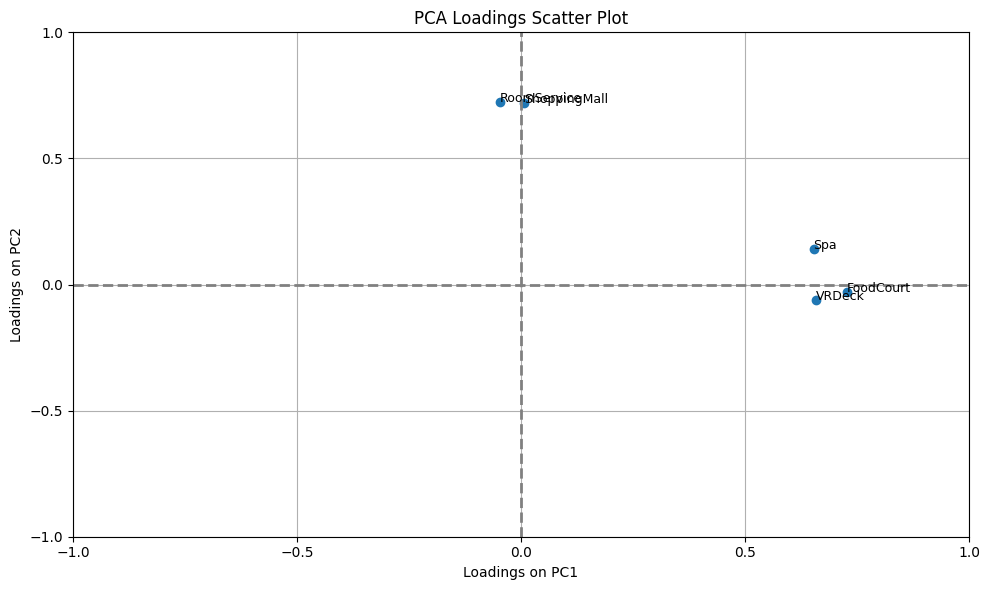

In [195]:
# Plot loading relationships

# Extract PC1 and PC2 loadings
x_loadings = loadings_df['PC1']
y_loadings = loadings_df['PC2']

# Create a scatter plot of the loadings
plt.figure(figsize=(10, 6))
plt.scatter(x_loadings, y_loadings)

# Annotate each point with the variable name
for i in range(len(x_loadings)):
    plt.annotate(loadings_df.index[i], (x_loadings[i], y_loadings[i]), fontsize=9)

plt.title('PCA Loadings Scatter Plot')
plt.xlabel('Loadings on PC1')
plt.ylabel('Loadings on PC2')

# Add bold lines at x=0 and y=0 with tick marks
plt.axhline(0, color='grey', lw=2, ls='--')  # Bold horizontal line at y=0
plt.axvline(0, color='grey', lw=2, ls='--')  # Bold vertical line at x=0

# Set major ticks on the axes
plt.xticks(np.arange(-1, 2, 0.5))  # Adjust the range as needed
plt.yticks(np.arange(-1, 2, 0.5))  # Adjust the range as needed

plt.grid()
plt.xlim(-1, 1)  # Adjust limits as necessary
plt.ylim(-1, 1)  # Adjust limits as necessary
plt.tight_layout()
plt.show()

In [196]:
# Explain the variance ratio
print("Explained variance per component:", pca.explained_variance_ratio_)
print("Total explained variance:", sum(pca.explained_variance_ratio_))

Explained variance per component: [0.27811032 0.21309778]
Total explained variance: 0.4912081050553352


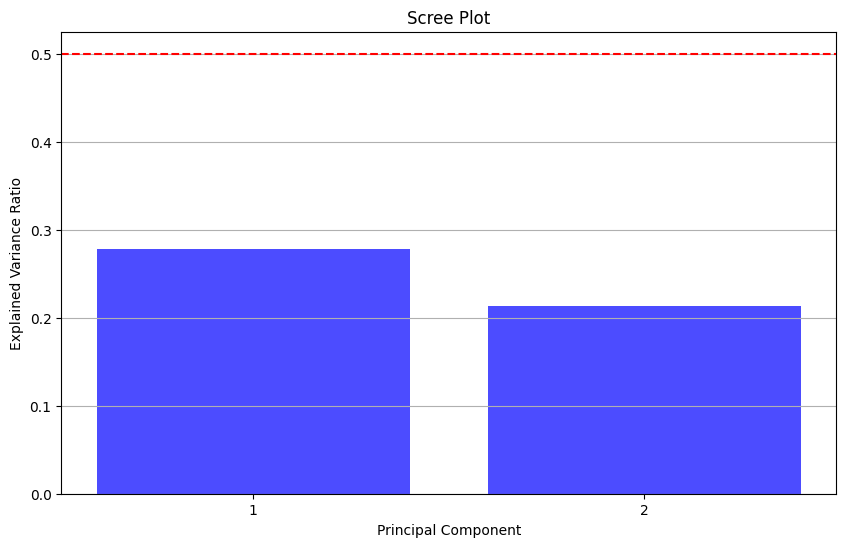

In [197]:
# Scree plot

explained_variance = pca.explained_variance_ratio_



pca_results = pd.DataFrame({
    'Principal Component': np.arange(1, len(explained_variance) + 1),
    'Explained Variance': explained_variance
})

# Plot Scree Plot
plt.figure(figsize=(10, 6))
plt.bar(pca_results['Principal Component'], pca_results['Explained Variance'], alpha=0.7, color='b')
plt.xticks(pca_results['Principal Component'])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(axis='y')
plt.axhline(y=1/len(explained_variance), color='r', linestyle='--')  # Add a horizontal line at the average variance
plt.show()

In [198]:
# Combine with PassengerId 
pca_scores = pd.concat([train[[testing_variable]], pca_df], axis=1)

# Display the first few rows of the final DataFrame
print(pca_scores.head())

  HomePlanet       PC1       PC2
0     Europa -0.466113 -0.470630
1      Earth -0.181762 -0.259368
2     Europa  4.120984  0.308589
3     Europa  1.716691  0.341139
4      Earth -0.183002  0.106895


In [199]:
# Check for and remove NaN values

# Number of NaN values in each column
num_nan = pca_scores.isnull().sum()

# Print columns with NaN values greater than 0
print(num_nan[num_nan > 0])

HomePlanet    1607
PC1           1607
PC2           1607
dtype: int64


In [200]:
pca_scores = pca_scores.dropna()

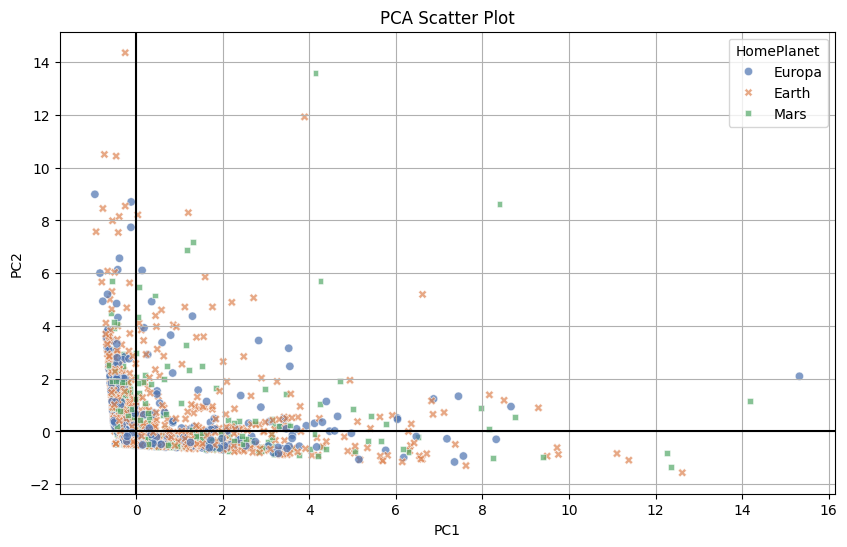

In [201]:
# Create a scatter plot of PCA scores using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_scores, x='PC1', y='PC2', hue='HomePlanet', style='HomePlanet', palette='deep', alpha=0.7)

# Customize the plot
plt.axhline(0, color='black', linewidth=1.5)
plt.axvline(0, color='black', linewidth=1.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.grid()

# Show the plot
plt.show()

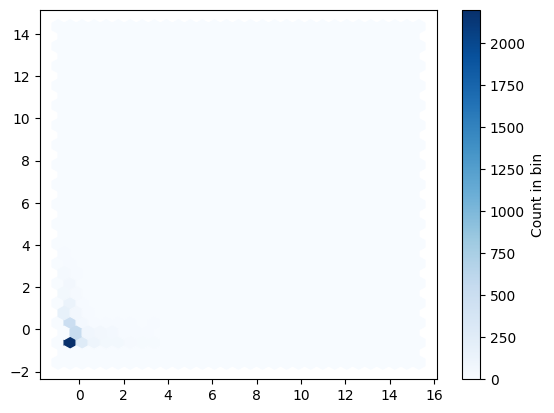

In [202]:
# Density Plot
plt.hexbin(pca_scores['PC1'], pca_scores['PC2'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in bin')

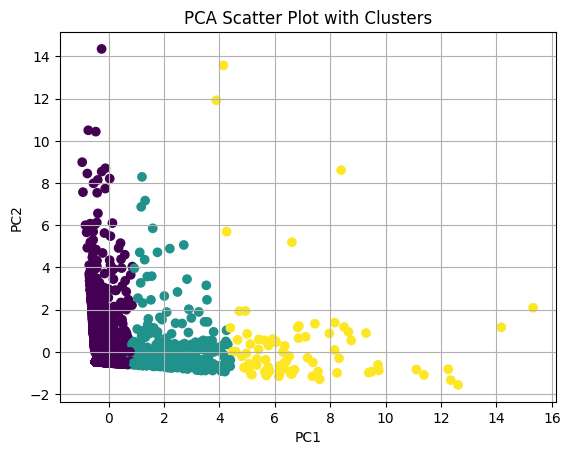

In [203]:
# K-Means clustering
kmeans = KMeans(n_clusters=3)
pca_scores['Cluster'] = kmeans.fit_predict(pca_scores[['PC1', 'PC2']])

# Scatter plot with clusters
plt.scatter(pca_scores['PC1'], pca_scores['PC2'], c=pca_scores['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot with Clusters')
plt.grid()
plt.show()